In [175]:
from meteostat import Stations, Point, Daily, Monthly
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [5]:
stations = Stations()
# Latitude, Longitude, Radius in m around geographical point
stations_kyoto = stations.nearby(35.0119831, 135.6761135, 10000) 
st_kyoto = stations_kyoto.fetch()
#location = st_kyoto['wmo'][0]  
st_kyoto

,name,country,region,wmo,icao,latitude,longitude,elevation,timezone,hourly_start,hourly_end,daily_start,daily_end,monthly_start,monthly_end,distance
id,,,,,,,,,,,,,,,,
47759,Kyoto,JP,KY,47759,<NA>,35.0167,135.7333,41.0,Asia/Tokyo,NaT,NaT,1945-10-31,2023-02-16,1951-01-01,2022-01-01,5234.295173


## Japan

In [176]:
start = datetime(1991, 1, 1) # Set time period
end = datetime(1991, 12, 31)
location = Point(35.01472222, 135.732777777778, 40.81) # Japan/Kyoto
#location = Point(45.415, 141.678888888889, 2.85) # Japan/Wakkanai
#location = Point(40.52722222, 141.5216667, 27.1) # Japan/Hachinohe
#location = Point(36.58972222, 136.6347222, 5.7) # Japan/Kanazawa
#location = Point(35.27611111, 136.2438889, 87.3) # Japan/Hikone
try:
    data = Daily(location, start, end)
except Exception as e:
    print("no data")
#data = Daily(location, start, end)
data = data.fetch()
print('First available data for tavg:', data.tavg.first_valid_index())
print('First available data for tmin:', data.tmin.first_valid_index())
print('First available data for tmax:', data.tmax.first_valid_index())
print('First available data for precipitation:', data.prcp.first_valid_index())
print(data.isnull().sum(axis=0))
print(data.shape[0])
data.head(8)

First available data for tavg: 1991-01-01 00:00:00
First available data for tmin: 1991-01-01 00:00:00
First available data for tmax: 1991-01-01 00:00:00
First available data for precipitation: 1991-01-01 00:00:00
tavg     30
tmin    150
tmax     31
prcp    235
snow    359
wdir    364
wspd    364
wpgt    364
pres    364
tsun    364
dtype: int64
364


,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
1991-01-01,10.8,6.9,13.6,3.0,NaN,NaN,NaN,NaN,NaN,NaN
1991-01-02,8.9,NaN,13.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1991-01-03,5.3,NaN,9.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-01-04,4.5,1.7,9.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-01-05,2.7,NaN,7.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-01-06,3.8,-1.0,7.3,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1991-01-07,4.9,1.0,8.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-01-08,4.5,NaN,7.9,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [183]:
start = datetime(1990, 1, 1) # Set time period
end = datetime(1992, 12, 31)
data = Monthly('47759', start, end)
data = data.fetch()
data

,tavg,tmin,tmax,prcp,wspd,pres,tsun
time,,,,,,,
1991-09-01,25.0,NaN,29.6,NaN,NaN,NaN,NaN


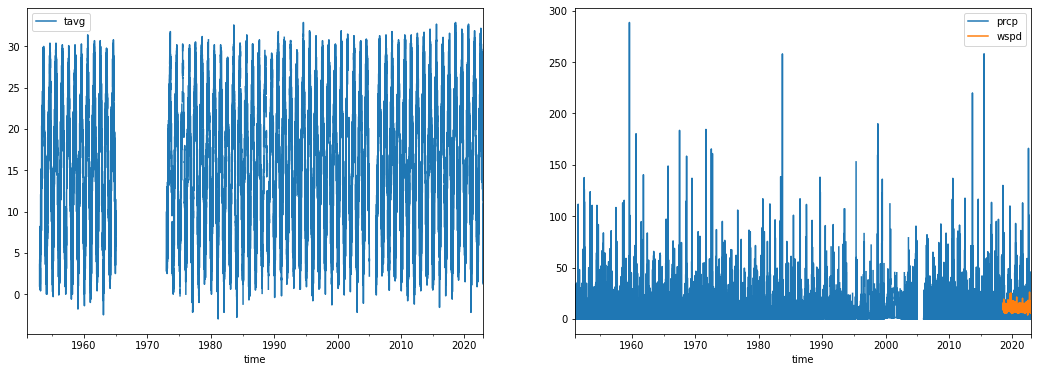

In [123]:
# The average, minimum and maximum temperature; the daily precipitation total in mm; The average wind speed in km/h
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
data.plot(ax=axs[0], y=['tavg'])
data.plot(ax=axs[1], y=['prcp', 'wspd'])
plt.show()

## Vancouver

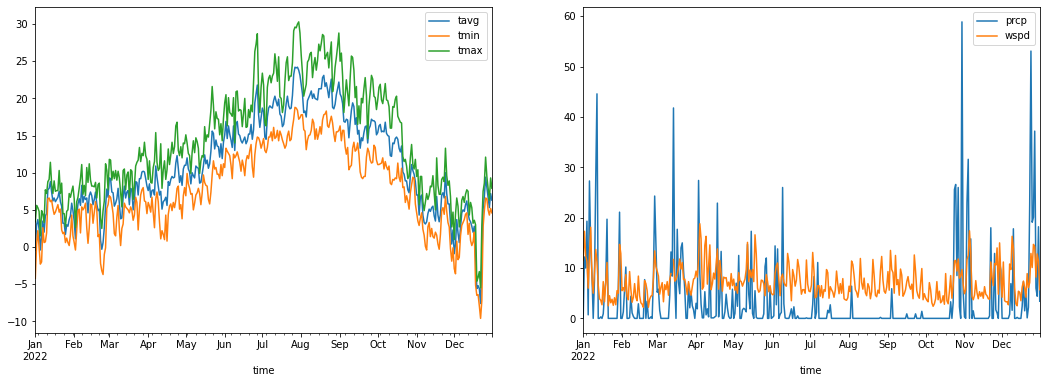

In [184]:
# Create Point for Vancouver, BC
# lat, lon, alt
location = Point(49.2497, -123.1193, 70)

start = datetime(2022, 1, 1) # Set time period
end = datetime(2022, 12, 31)
data = Daily(location, start, end)
data = data.fetch()

# The average, minimum and maximum temperature; the daily precipitation total in mm; The average wind speed in km/h
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
data.plot(ax=axs[0], y=['tavg', 'tmin', 'tmax'])
data.plot(ax=axs[1], y=['prcp', 'wspd'])
plt.show()

In [185]:
data = Monthly(location, start, end)
data = data.fetch()
data

,tavg,tmin,tmax,prcp,wspd,pres,tsun
time,,,,,,,
2022-01-01,4.5,2.5,6.5,232.2,7.9,1020.7,NaN
2022-02-01,5.2,2.7,7.7,84.9,5.7,1025.4,NaN
2022-03-01,7.5,4.8,10.2,180.6,NaN,NaN,NaN
2022-04-01,8.5,4.9,12.0,121.0,9.4,1016.1,NaN
2022-05-01,11.6,8.3,14.8,104.2,14.2,1016.4,NaN
2022-06-01,15.8,12.1,19.5,68.2,7.7,1015.9,NaN
2022-07-01,19.4,15.2,23.6,28.8,6.1,1016.3,NaN
2022-08-01,20.6,16.0,25.1,6.6,6.9,1015.4,NaN
2022-09-01,16.7,12.4,21.0,9.1,7.2,1016.0,NaN


In [56]:
data.isnull().sum(axis=0) # full data for tavg and prcp

tavg      0
tmin      0
tmax      0
prcp      0
snow     99
wdir      1
wspd      1
wpgt    173
pres      1
tsun    365
dtype: int64

## South Korea

First available data for tavg: 1993-10-16 00:00:00
First available data for tmin: 1993-10-16 00:00:00
First available data for tmax: 1993-10-16 00:00:00
First available data for precipitation: 2021-01-03 00:00:00
            tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt  pres  tsun
time                                                                   
1993-10-16  17.1  12.5  22.5   NaN   NaN  237.0  13.7   NaN   NaN   NaN
1993-10-17   NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN
1993-10-18   NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN
1993-10-19   NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN
tavg     9400
tmin     9400
tmax     9400
prcp     9941
snow    10669
wdir     9590
wspd     9442
wpgt    10669
pres     9628
tsun    10669
dtype: int64


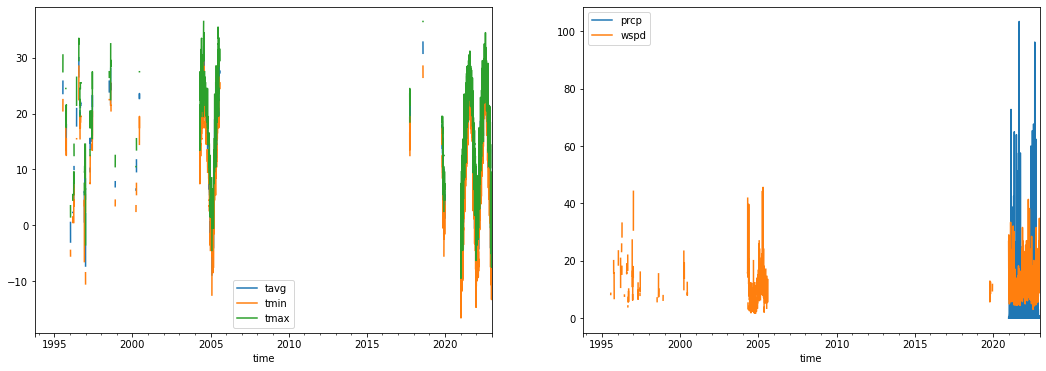

In [143]:
# lat, lon, alt
location = Point(38.25085, 128.56472, 18.06) # South Korea/Sokcho
#location = Point(37.67713, 128.71833, 772.57) #South Korea/Daegwallyeong
#location = Point(37.90256,127.7357,76.47) #South Korea/Chuncheon

start = datetime(1980, 1, 1) # Set time period
end = datetime(2022, 12, 31)
data = Daily(location, start, end)
data = data.fetch()
print('First available data for tavg:', data.tavg.first_valid_index())
print('First available data for tmin:', data.tmin.first_valid_index())
print('First available data for tmax:', data.tmax.first_valid_index())
print('First available data for precipitation:', data.prcp.first_valid_index())
print(data.head(4))
print(data.isnull().sum(axis=0))
# The average, minimum and maximum temperature; the daily precipitation total in mm; The average wind speed in km/h
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
data.plot(ax=axs[0], y=['tavg', 'tmin', 'tmax'])
data.plot(ax=axs[1], y=['prcp', 'wspd'])
plt.show()

## Switzerland

First available data for tavg: 1983-01-01 00:00:00
First available data for tmin: 1983-01-01 00:00:00
First available data for tmax: 1983-01-01 00:00:00
First available data for precipitation: 1983-01-01 00:00:00
tavg      0
tmin      0
tmax      0
prcp      0
snow      0
wdir    359
wspd    324
wpgt    365
pres    365
tsun      0
dtype: int64
            tavg  tmin  tmax  prcp  snow  wdir  wspd  wpgt  pres   tsun
time                                                                   
1983-01-01  -0.6  -3.0   3.7   0.0   0.0   NaN   NaN   NaN   NaN  252.0
1983-01-02   0.6  -3.6   1.6   9.4   0.0   NaN   NaN   NaN   NaN    0.0
1983-01-03   3.6   1.4   4.4   7.4   0.0   NaN   NaN   NaN   NaN    0.0
1983-01-04   9.1   4.2  11.2   8.2   0.0   NaN   NaN   NaN   NaN    0.0


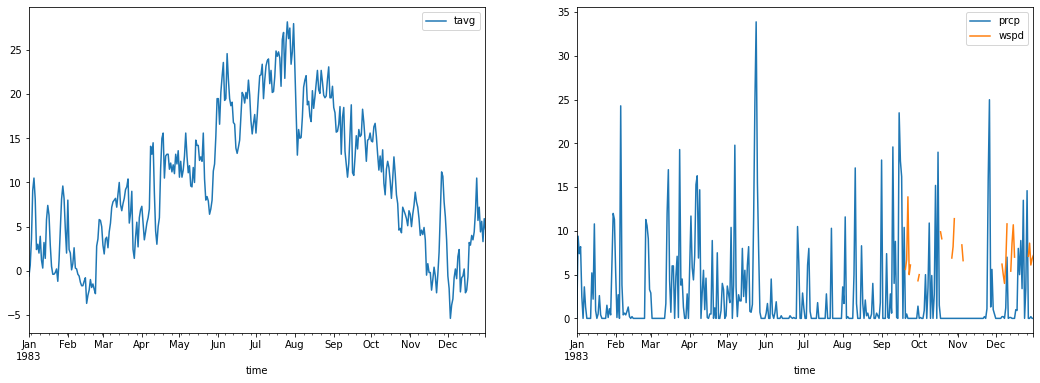

In [187]:
location = Point(47.481403,7.730519,350) #Switzerland/Liestal
#location = Point(47.4814,7.730519,350) # liestal
#location = Point(47.157753,7.214464,700) # Switzerland/Orvin
start = datetime(1983, 1, 1) # Set time period
end = datetime(1983, 12, 31)
data = Daily(location, start, end)
data = data.fetch()
print('First available data for tavg:', data.tavg.first_valid_index())
print('First available data for tmin:', data.tmin.first_valid_index())
print('First available data for tmax:', data.tmax.first_valid_index())
print('First available data for precipitation:', data.prcp.first_valid_index())
print(data.isnull().sum(axis=0))
print(data.head(4))
# The average, minimum and maximum temperature; the daily precipitation total in mm; The average wind speed in km/h
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
#data.plot(ax=axs[0], y=['tavg', 'tmin', 'tmax'])
data.plot(ax=axs[0], y='tavg')
data.plot(ax=axs[1], y=['prcp', 'wspd'])
plt.show()

In [198]:
start = datetime(1980, 1, 1) # Set time period
end = datetime(1992, 12, 31)
data = Monthly(location, start, end)
data = data.fetch()
data

,tavg,tmin,tmax,prcp,wspd,pres,tsun
time,,,,,,,
1980-01-01,-0.1,-2.2,2.1,111.6,NaN,NaN,3024.0
1980-02-01,4.2,1.2,8.2,53.8,NaN,NaN,5592.0
1980-03-01,5.5,2.1,10.0,93.4,NaN,NaN,5892.0
1980-04-01,7.4,3.0,12.4,41.8,NaN,NaN,8790.0
1980-05-01,12.2,6.8,17.3,87.5,NaN,NaN,11868.0
...,...,...,...,...,...,...,...
1992-08-01,21.2,15.7,27.9,124.9,NaN,1015.7,15630.0
1992-09-01,15.2,11.1,20.6,52.3,NaN,1020.1,9918.0
1992-10-01,8.5,6.1,11.8,133.3,NaN,1010.9,2316.0


In [202]:
data.index[0].strftime("%B")
#.ToString("MMMMMMMMMMMMM")

'January'

## Washington DC

            tavg  tmin  tmax  prcp  snow  wdir  wspd  wpgt  pres  tsun
time                                                                  
1936-09-01  24.5   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
1936-09-02  22.4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
1936-09-03  23.3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
1936-09-04  23.9   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
First available data for tavg: 1936-09-01 00:00:00
First available data for tmin: 1937-08-06 00:00:00
First available data for tmax: 1937-08-06 00:00:00
First available data for precipitation: 1941-06-16 00:00:00
tavg       56
tmin      389
tmax      389
prcp     1749
snow     2084
wdir     7960
wspd      450
wpgt    13736
pres     6797
tsun    18572
dtype: int64


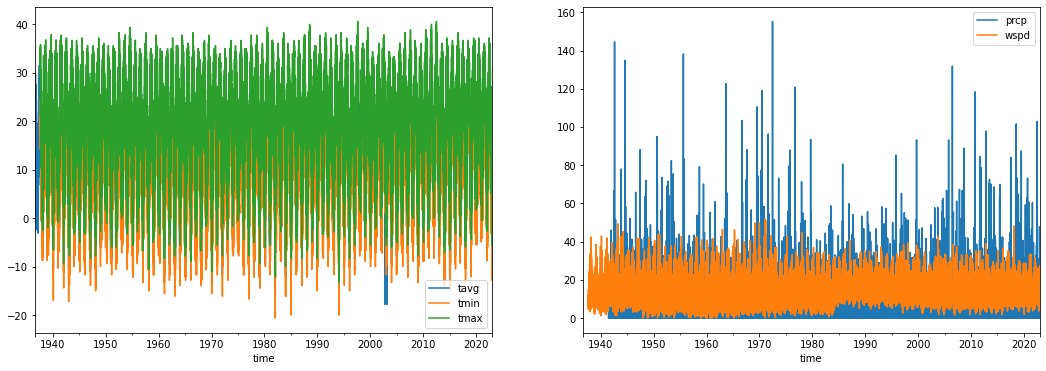

In [139]:
location = Point(38.8853496,-77.0386278,0) #washingtondc

start = datetime(1921, 1, 1) # Set time period
end = datetime(2022, 12, 31)
data = Daily(location, start, end)
data = data.fetch()
print(data.head(4))
print('First available data for tavg:', data.tavg.first_valid_index())
print('First available data for tmin:', data.tmin.first_valid_index())
print('First available data for tmax:', data.tmax.first_valid_index())
print('First available data for precipitation:', data.prcp.first_valid_index())
print(data.isnull().sum(axis=0))
# The average, minimum and maximum temperature; the daily precipitation total in mm; The average wind speed in km/h
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
data.plot(ax=axs[0], y=['tavg', 'tmin', 'tmax'])
data.plot(ax=axs[1], y=['prcp', 'wspd'])
plt.show()

In [ ]:
# model: location; lat; long; alt; year; bloom_doy + tavg
# validation set - 5 random years
# traint set - the rest available data
# test set - 2023. make forecast prediction for april-may at all locations
# unbalanced for multi-class classification: 
# N+1 classes (more than N daus before bllom peak; N days,...Bloom peak). N = 10 (?) Parameter to tune.

In [74]:
filenames = ['data/vancouver.csv', 'data/japan.csv', 'data/meteoswiss.csv', 'data/south_korea.csv', 
             'data/washingtondc.csv']
df_bloom = pd.concat( [ pd.read_csv(f) for f in filenames ] )

In [75]:
df_bloom.head()

,location,lat,long,alt,year,bloom_date,bloom_doy
0,vancouver,49.2237,–123.1636,24.00,2022,2022-03-27,86
0,Japan/Wakkanai,45.4150,141.678889,2.85,1953,1953-05-30,150
1,Japan/Wakkanai,45.4150,141.678889,2.85,1954,1954-05-27,147
2,Japan/Wakkanai,45.4150,141.678889,2.85,1955,1955-05-23,143
3,Japan/Wakkanai,45.4150,141.678889,2.85,1956,1956-05-14,135


In [91]:
print('#Unique locations: ', df_bloom.location.unique().size)
df_bloom.sort_values(by=['bloom_doy']).head(10)

#Unique locations:  327


,location,lat,long,alt,year,bloom_date,bloom_doy
6353,Japan/Ishigakijima,24.336667,124.164444,5.7,1989,1989-01-08,8
6224,Japan/Naze,28.379722,129.495556,2.8,1989,1989-01-13,13
6225,Japan/Naze/Funchatoge,28.394167,129.552778,294.1,1989,1989-01-13,13
6446,Japan/Kumejima,26.338056,126.803889,5.0,1989,1989-01-15,15
6222,Japan/Naze,28.379722,129.495556,2.8,1988,1988-01-18,18
6223,Japan/Naze/Funchatoge,28.394167,129.552778,294.1,1988,1988-01-18,18
6516,Japan/Nago,26.594167,127.966389,6.1,1989,1989-01-18,18
6335,Japan/Ishigakijima,24.336667,124.164444,5.7,1968,1968-01-19,19
6339,Japan/Ishigakijima,24.336667,124.164444,5.7,1974,1974-01-20,20
6200,Japan/Naze,28.379722,129.495556,2.8,1977,1977-01-21,21


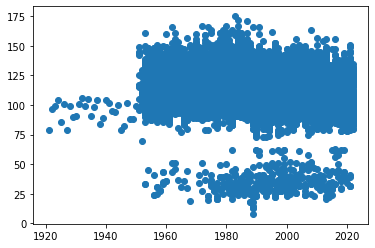

In [85]:
plt.scatter(df_bloom.year, df_bloom.bloom_doy)
plt.show()

In [86]:
df_bloom.bloom_doy.describe()

count    14183.000000
mean       107.053021
std         19.754987
min          8.000000
25%         96.000000
50%        105.000000
75%        119.000000
max        175.000000
Name: bloom_doy, dtype: float64

In [193]:
import calendar
list(calendar.month_name)[1:]

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']